<a href="https://colab.research.google.com/github/mudimusimon/hello-world/blob/master/Diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Neural Network**
Simon Mudimu

In [ ]:
!pip install pip install scikit-plot

**Import Modules**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt

%matplotlib inline

**Process Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pimadiabetes-set.csv")
df.head() # shows us the first five records of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info() #concise summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe() #statistical summary of the dataset 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr() #correlation between features.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


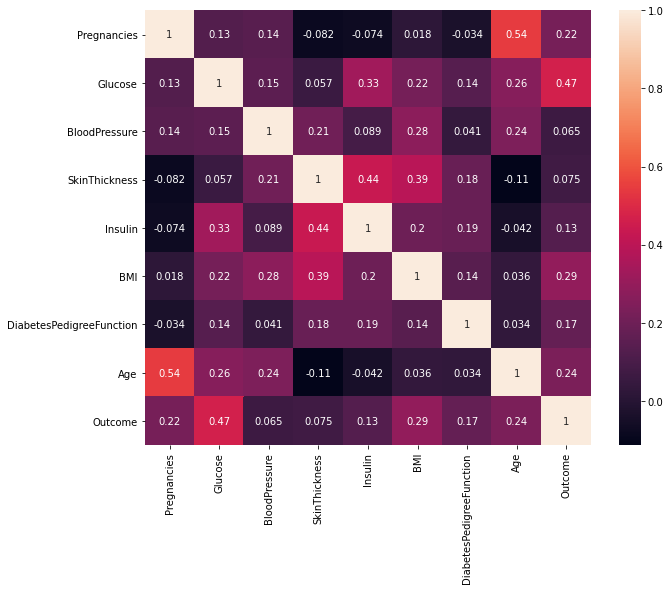

In [ ]:
#visual representation of the correlation between the features.
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

**The data contains some zero entries, so they need to be removed**

In [ ]:
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def check_zero_entries(data, fields):
    """ List number of 0-entries in each of the given fields"""
    for field in fields:
        print('name: %s: num of 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))

check_zero_entries(df, zero_fields)

name: Glucose: num of 0-entries: 5
name: BloodPressure: num of 0-entries: 35
name: SkinThickness: num of 0-entries: 227
name: Insulin: num of 0-entries: 374
name: BMI: num of 0-entries: 11


In [ ]:
norm_cols =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',"Age","Outcome"]

In [ ]:
norm_df = df[norm_cols].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )
X_Data = norm_df
Y_Data = df["Outcome"]
    
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Create a feature column**

In [ ]:
def create_feature_column():
    
    feat_Pregnancies = tf.feature_column.numeric_column('Pregnancies')
    feat_Glucose = tf.feature_column.numeric_column('Glucose')
    feat_BloodPressure = tf.feature_column.numeric_column('BloodPressure')
    feat_SkinThickness_tricep = tf.feature_column.numeric_column('SkinThickness')
    feat_Insulin = tf.feature_column.numeric_column('Insulin')
    feat_BMI = tf.feature_column.numeric_column('BMI')
    feat_DiabetesPedigreeFunction  = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
    
    feature_column = [feat_Pregnancies, feat_Glucose, feat_BloodPressure, 
                  feat_SkinThickness_tricep, feat_Insulin, 
                 feat_BMI , feat_DiabetesPedigreeFunction] 
    
    return feature_column

In [ ]:
import tensorflow as tf
feature_column = create_feature_column()


input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_Train,Y_Train,batch_size=50,num_epochs=1000,shuffle=True)

eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_Test,Y_Test,batch_size=50,num_epochs=1,shuffle=False)
predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_Test,num_epochs=1,shuffle=False)

**Create a Deep Neural Network model**

In [ ]:
model = tf.estimator.DNNClassifier(hidden_units = [20,20],feature_columns = feature_column,n_classes=2,activation_fn=tf.nn.sigmoid,dropout=None,optimizer = tf.optimizers.Adam(learning_rate =0.05))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr3j8dht9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Train the model**

In [ ]:
data_hist = model.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpr3j8dht9/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.85299855, step = 0
INFO:tensorflow:global_step/sec: 327.505
INFO:tensorflow:loss = 0.33393133, step = 100 (0.314 sec)
INFO:tensorflow:global_step/sec: 369.389
INFO:tensorflow:loss = 0.35612416, step = 200 (0.266 sec)
INFO:tensorflow:global_step/sec: 358.907
INFO:tensorflow:loss = 0.32407814, step = 300 (0.277 sec)
INFO:tensorflow:global_step/sec: 374.994
INFO:tensorflow:loss = 0.61340517, step = 400 (0.273 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 500...
INFO:tensorflow:Saving

**Test the model**

In [ ]:
model.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-29T18:58:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr3j8dht9/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.51953s
INFO:tensorflow:Finished evaluation at 2021-04-29-18:58:16
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.77922076, accuracy_baseline = 0.64935064, auc = 0.84074074, auc_precision_recall = 0.74420166, average_loss = 0.46121463, global_step = 500, label/mean = 0.35064936, loss = 0.46478224, precision = 0.72727275, prediction/mean = 0.34702778, recall = 0.5925926
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: /tmp/tmpr3j8dht9/model.ckpt-500


{'accuracy': 0.77922076,
 'accuracy_baseline': 0.64935064,
 'auc': 0.84074074,
 'auc_precision_recall': 0.74420166,
 'average_loss': 0.46121463,
 'global_step': 500,
 'label/mean': 0.35064936,
 'loss': 0.46478224,
 'precision': 0.72727275,
 'prediction/mean': 0.34702778,
 'recall': 0.5925926}

**Make prediction**

In [ ]:
predictions = list(model.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test,prediction)
conmat = confusion_matrix(Y_Test,prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr3j8dht9/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


**Analyse the results**

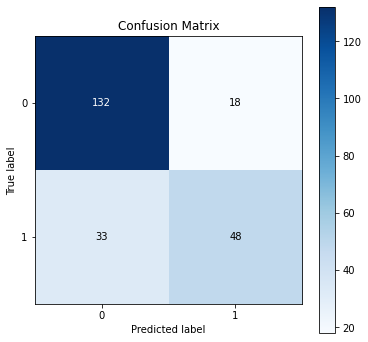

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_Test,prediction,figsize=(6,6),title="Confusion Matrix")

In [ ]:
print(data)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       150
           1       0.68      0.63      0.65        81

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231

